In [3]:
!pip install opencv-python

You should consider upgrading via the 'C:\Users\pmg07\M2\acoustic-emission-endmilling\test\Scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [47]:
img1 = cv2.imread(rf'Z:\200 Produced_data\20220630\TrainingData\FFT\split0.1\fig\FFT_334.png')
img2 = cv2.imread(rf'Z:\200 Produced_data\20220630\TrainingData\FFT\split0.5\fig\FFT_334.png')

In [38]:
print(img1.shape)
print(img2.shape)

(1440, 1920, 3)
(1200, 1800, 3)


In [62]:
img2 = cv2.resize(img2, dsize=(5000,1400))
img1 = cv2.resize(img1, dsize=(5000,1400))

In [42]:
img2.shape

(1440, 1920, 3)

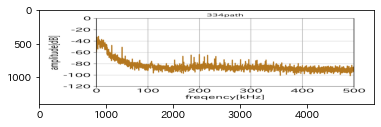

In [64]:
plt.imshow(img2)
# plt.imshow(img1)

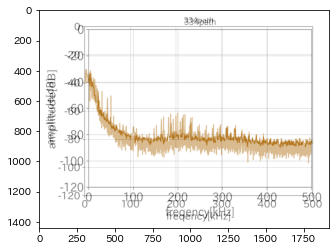

In [55]:
blend = cv2.addWeighted(img1,0.5,img2,0.5,0)
plt.imshow(blend)

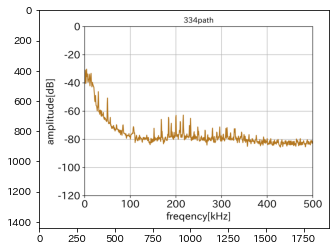

In [44]:
plt.imshow(img1)

In [67]:
img3 = cv2.imread(rf'Z:\200 Produced_data\inoue2020_A\FFT\split1,overlap1\fig\FFT_334.png')

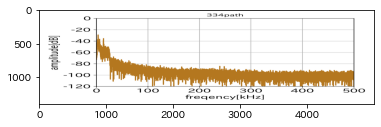

In [69]:
img3 = cv2.resize(img3, dsize=(5000,1400))
plt.imshow(img3)


In [3]:
from loadTDMS import *
from fft_test import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [7]:
num = 4

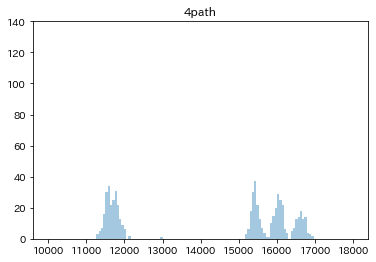

In [8]:
x_min = 10000
x_max = 18000
range_bin_width = range(x_min, x_max, 60)

dd = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\{num}.npy")
dd2 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\{num}.npy")

figure, ax = plt.subplots()
hist_p = sns.distplot(dd, bins=range_bin_width, kde=False, rug=False)
# hist_p = sns.distplot(dd, bins=range_bin_width, kde=False, rug=False)
figure = hist_p.get_figure()
hist_p.set_title(rf"{num}path")
ax.set_ylim(0, 140)
figure.savefig(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\{num}.png")

In [10]:
def fft_integrated_one_rotation_fig(start,end,num,j):
    load_path = rf"Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_{num}.tdms"
    d = load_tdms(load_path, ch_num=3)
    d = d[0][start:end]
    
    dt = 1/10**6
    split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
    overlap = 0.5  # オーバーラップ率
    window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
    y_label = "amplitude"
    y_unit = "V"
    N = len(d)
    fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
    
    
    fq_, amp_ = FFT_main(fq, d, dt, split_t_r, overlap, window_F)

    output_FN = fr"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\FFT_{num}_{j}"
    plot_FFT(fq_, amp_, output_FN, y_label, y_unit,num)
    
    return 20*np.log10(amp_) +85

In [12]:
for i in [4]:
    mensekis = []
    for j in tqdm(range(0,592)):
        num = i
        sample_num = 2**14
        start = j * 25000
        end = start + sample_num
        fft_result = fft_integrated_one_rotation_fig(start,end,num,j)
#         menseki = time_hist_integrator_rect(1,fft_result)
#         mensekis.append(menseki)
#     d = np.array(mensekis)
#     np.save(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\{num}", d)

100%|██████████| 592/592 [16:32<00:00,  1.68s/it]
